<a href="https://colab.research.google.com/github/Dhanraj200547/Linear-Regression/blob/main/Stock_price_prediction_using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
import yfinance as yf

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.metrics import mean_squared_error,r2_score

In [6]:
import matplotlib.pyplot as plt

In [7]:
# get Historical data

In [8]:
ticker = 'AAPL'

In [9]:
data = yf.download(ticker,start='2005-01-01',end='2025-01-01')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [10]:
# we need only close price

In [11]:
data = data[['Close']].copy()

In [12]:
# create features

In [18]:
data['Previous_Close'] = data['Close'].shift(1)

In [19]:
data.dropna(inplace=True)

In [20]:
#features and labels

In [31]:
X = data[['Previous_Close']]

In [32]:
y = data['Close']

In [33]:
#train test split

In [34]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,shuffle= False)

In [35]:
#train linear regression model

In [36]:
model = LinearRegression()

In [37]:
model.fit(X_train, y_train)

LinearRegression()

In [38]:
#make predictions

In [39]:
y_pred = model.predict(X_test)

In [40]:
#evaluation

In [41]:
MSE = mean_squared_error(y_test,y_pred)

In [42]:
R2 = r2_score(y_test,y_pred)

In [44]:
print(f"Mean Squared Error: {MSE:.2f}")

Mean Squared Error: 7.27


In [45]:
print(f"R-squared: {R2:.2f}")

R-squared: 0.99


In [46]:
#plot the figures

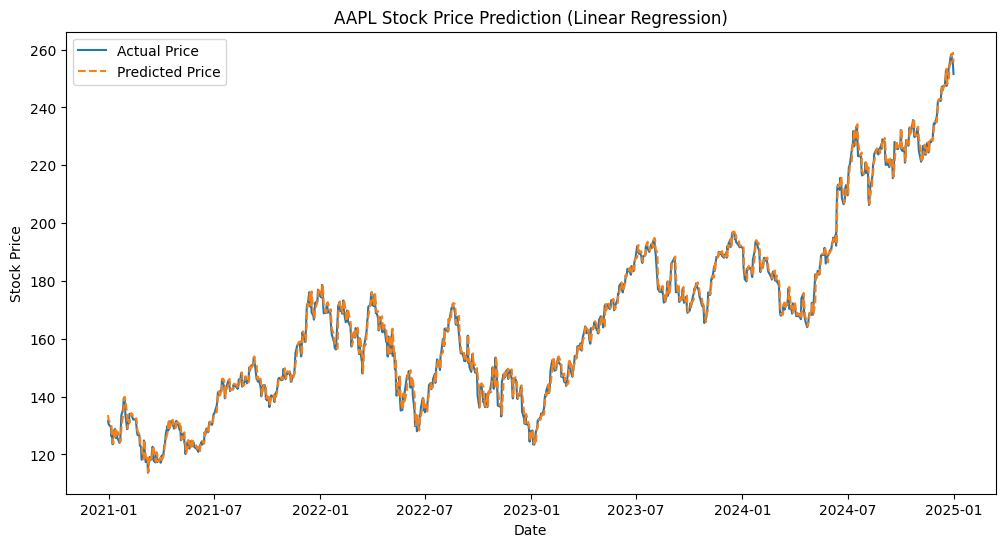

In [57]:
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual Price')
plt.plot(y_test.index, y_pred, label='Predicted Price', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title(f"{ticker} Stock Price Prediction (Linear Regression)")
plt.legend()
plt.show()